# <center><font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font></center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###

## <b><font color='red'>     NOTE: This IPython notebook should be read alonside the corresponding chapter in the book, where each piece of code is fully explained.     </font></b> <br>

# <center>Chapter 4. SciPy for Numerical Analysis</center>

##Summary##

This chapter is without a doubt one of the most interesting chapters in this book. It covers with great detail the definition and manipulation of functions (one or several variables), the extraction of their roots, extreme values (optimization), computation of derivatives, integration, interpolation, regression, and applications to the solution of ordinary differential equations.

##Evaluation of special functions##

>[Special functions (scipy.special)](http://docs.scipy.org/doc/scipy-0.14.0/reference/special.html)

##Convenience and test functions###

In [1]:
import scipy.special
import numpy

In [2]:
a=scipy.special.exp10(-16)
numpy.log(1+a)

0.0

In [3]:
scipy.special.log1p(a)

9.9999999999999998e-17

### Univariate polynomials

In [4]:
P1=numpy.poly1d([1,0,1])           # using coefficients
print(P1)

   2
1 x + 1


In [5]:
print(P1.r) #roots


[-0.+1.j  0.-1.j]


In [6]:
print(P1.o)#order


2


In [7]:
print (P1.deriv()) # derivative


 
2 x


In [8]:
P2=numpy.poly1d([1,1,1], True)     # using roots
print(P2)

   3     2
1 x - 3 x + 3 x - 1


In [9]:
P2=numpy.poly1d([1,1,1], True, variable='z') 
print (P2) 

   3     2
1 z - 3 z + 3 z - 1


In [10]:
P1( scipy.arange(10) )           # evaluate at 0,1,...,9

array([ 1,  2,  5, 10, 17, 26, 37, 50, 65, 82])

In [11]:
P1.__call__(scipy.arange(10))    # same evaluation

array([ 1,  2,  5, 10, 17, 26, 37, 50, 65, 82])

<font color=blue><b>Let's consider and evaluate the approximation of the natural logarithm:</b></font>

## $$ \boxed{ \begin{equation} ln(1+x) \approx 1 + \frac{x^2}{2}  \quad \text{if} \quad x \to 0 \end{equation} }$$

In [12]:
Px=numpy.poly1d([-(1./2.),1,0]) 

In [13]:
print(Px) 

      2
-0.5 x + 1 x


In [14]:
a=1./10000000000000000.
print(a)

1e-16


In [15]:
Px(a) 

9.9999999999999998e-17

In [16]:
P1=numpy.poly1d([1,0,1]) 
print(P1) 

   2
1 x + 1


<b><font color=red>As mentioned in the book, the following four (In []) lines of code show that the respective commands are equivalent, as shown by the corresponding Out[] lines</font></b>

In [17]:
print(scipy.polyadd(P1, scipy.poly1d([2,1])))

   2
1 x + 2 x + 2


In [18]:
print(scipy.polyadd(P1, [2,1]))

   2
1 x + 2 x + 2


In [19]:
print(P1 + scipy.poly1d([2,1]))

   2
1 x + 2 x + 2


In [20]:
print(P1 + [2,1])

   2
1 x + 2 x + 2


In [21]:
P1/[2,1]

(poly1d([ 0.5 , -0.25]), poly1d([ 1.25]))

<b><font color=red>As mentioned in the book, the output sould be read as follows:</font></b>

## $$ \boxed{ \begin{equation} \frac{x^2 + 1}{2x + 1}  = \underbrace{(\frac{1}{2}x - \frac{1}{4})}_\text{quotient} + \overbrace{ (\frac{5/4}{2x+1}) }^\text{reminder} \end{equation} }$$

In [22]:
x=numpy.linspace(-1,1,1000)

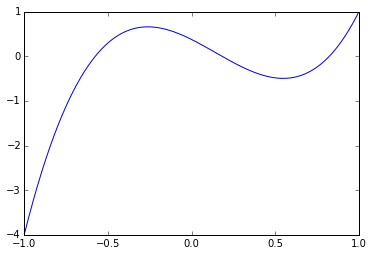

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,scipy.special.eval_jacobi(3,0,1,x))
plt.show()

## The gamma function

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following expressions is fully explained on the corresponding section for this chapter in the book</b></font>

## $$ \boxed{ \begin{equation} \Gamma(z) = \int_0^\infty \mathrm{e}^{-t}\, \mathrm{t}^{z-1} \,\mathrm{d}t \end{equation} }$$

## $$ \boxed{ \begin{equation} ln(a!/b!) \approx 10^{10} \Psi(a) \end{equation} }$$

In [24]:
(10**10)*scipy.special.psi(10**15)

345387763949.10681

## The Riemann zeta function

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following expressions is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$\boxed{ \begin{equation} \zeta(p) = \sum\limits_{n=1}^{\infty} \frac{1}{n^p} \end{equation} }$$

## $$ \boxed{ \begin{equation} zeta(a,p)=\sum\limits_{n=0}^{\infty} \frac{1}{(n+a)^p} \end{equation} }$$

In [25]:
scipy.special.zeta(2,1)

1.6449340668482266

## Airy (and Bairy) functions

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following equation is fully explained on the corresponding section for this chapter in the book</b></font>

## $$ \boxed{ \begin{equation} y'' = xy \end{equation} }$$

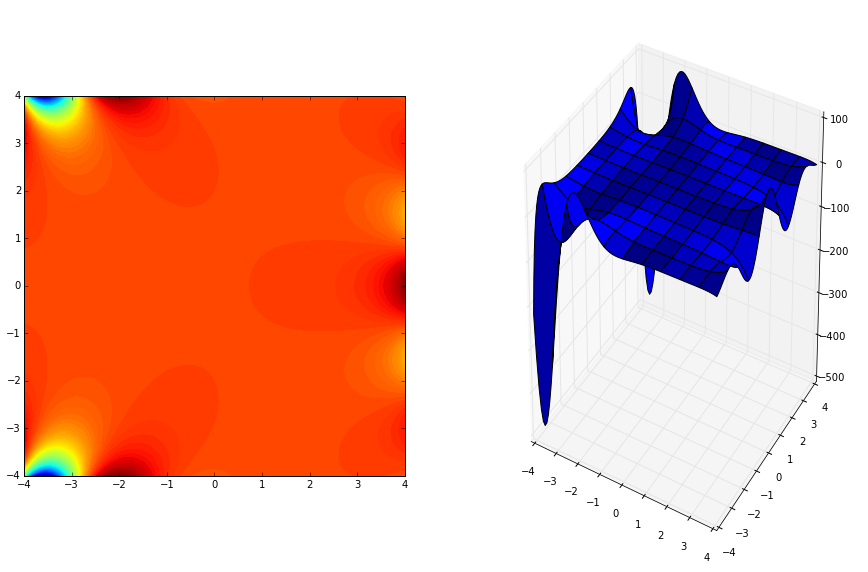

In [26]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)
import mpl_toolkits.mplot3d
x=numpy.mgrid[-4:4:100j,-4:4:100j]
z=x[0]+1j*x[1]
(Ai, Aip, Bi, Bip) = scipy.special.airy(z)
steps = range(int(Bi.real.min()), int(Bi.real.max()),6)
fig=plt.figure()
subplot1=fig.add_subplot(121,aspect='equal')
subplot1.contourf(x[0], x[1], Bi.real, steps)
subplot2=fig.add_subplot(122,projection='3d')
subplot2.plot_surface(x[0],x[1],Bi.real)
plt.show()

## Bessel and Struve functions

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following equations is fully explained on the corresponding section for this chapter in the book</b></font>

## $$ \boxed{ \begin{equation} x^2 y'' + x y' + (x^2 - \alpha^2)y=0 \end{equation} }$$

##  $$ \boxed{ \begin{equation} x^2 y'' + x y' + (x^2 - \alpha^2)y= \frac{  4 (x/2)^{\alpha + 1}  }{    \sqrt{\pi} (\alpha + \frac{1}{2})  } \end{equation} }$$

In [27]:
scipy.special.jn(5,scipy.pi)

0.052141184367118461

###Other special functions###

>[Special functions (scipy.special)](http://docs.scipy.org/doc/scipy-0.14.0/reference/special.html#module-scipy.special)

###Interpolation and regression###

>[Interpolation (scipy.interpolate)](http://docs.scipy.org/doc/scipy-0.14.0/reference/interpolate.html#module-scipy.interpolate)

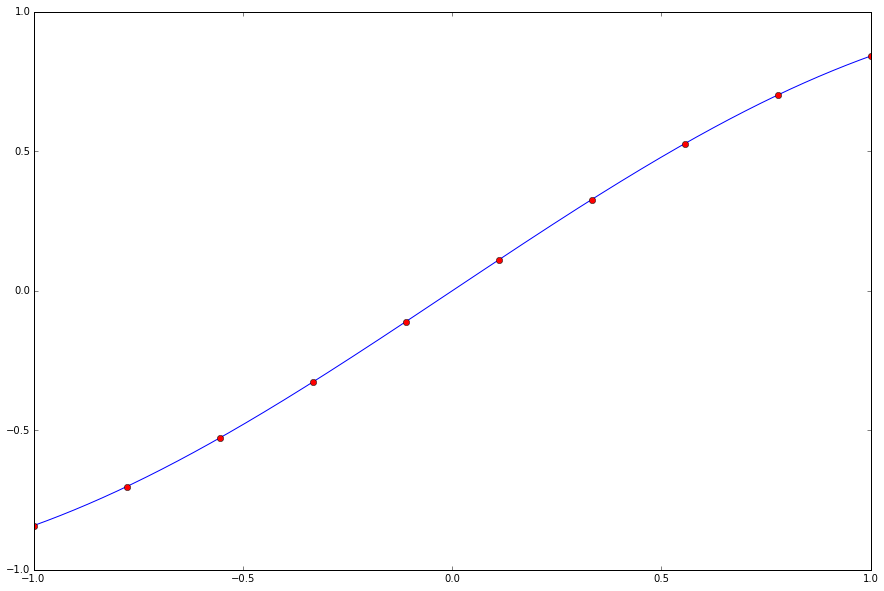

In [28]:
import scipy.interpolate
x=scipy.linspace(-1,1,10); xn=scipy.linspace(-1,1,1000)
y=scipy.sin(x)
polynomial=scipy.interpolate.lagrange(x, scipy.sin(x))
plt.plot(xn,polynomial(xn),x,y,'or')
plt.show()

<font color=red><b>To show extra details not shown in the book, the following lines of codes uses variables names slightly different from the ones in the code that appears in the book</b></font>

In [29]:
import numpy
import scipy.interpolate
x1=numpy.linspace(1,10,10); y1=numpy.sin(x1)
Polynomial=scipy.interpolate.BarycentricInterpolator(x1,y1)
exactValues1=numpy.sin(x1+0.3)
exactValues1

array([ 0.96355819,  0.74570521, -0.15774569, -0.91616594, -0.83226744,
        0.0168139 ,  0.85043662,  0.90217183,  0.12445442, -0.76768581])

In [30]:
interpolatedValues1=Polynomial(x1+0.3)
interpolatedValues1

array([ 0.97103132,  0.74460631, -0.15742869, -0.91631362, -0.83216445,
        0.01670922,  0.85059283,  0.90181323,  0.12588718, -0.7825744 ])

In [31]:
PercentRelativeError1 = \
       numpy.abs((exactValues1 - interpolatedValues1)/interpolatedValues1)*100
PercentRelativeError1

array([ 0.76960822,  0.14758101,  0.20136334,  0.01611703,  0.01237594,
        0.62647084,  0.01836479,  0.0397652 ,  1.13812858,  1.90251374])

In [32]:
x2=numpy.linspace(1.5,10.5,10); y2=numpy.sin(x2)
Polynomial.add_xi(x2,y2)
interpolatedValues=Polynomial(x1+0.3)
interpolatedValues

array([ 0.96355818,  0.74570521, -0.15774569, -0.91616594, -0.83226744,
        0.0168139 ,  0.85043662,  0.90217183,  0.12445442, -0.76768581])

In [33]:
PercentRelativeError = \
       numpy.abs((exactValues1 - interpolatedValues)/interpolatedValues)*100
PercentRelativeError

array([  1.26234691e-07,   2.02539472e-09,   5.95173203e-10,
         1.84316962e-11,   8.73752888e-12,   4.14379958e-10,
         1.75064084e-11,   8.52321518e-11,   9.45272910e-09,
         1.29551726e-07])

In [34]:
x3=numpy.sort(numpy.ravel([x1,x2]))
y3=numpy.sin(x3)
Polynomial3=scipy.interpolate.BarycentricInterpolator(x3,y3)
interpolatedValues3=Polynomial3(x1+0.3)
interpolatedValues3

array([ 0.96355818,  0.74570521, -0.15774569, -0.91616594, -0.83226744,
        0.0168139 ,  0.85043662,  0.90217183,  0.12445442, -0.76768581])

In [35]:
PercentRelativeError3 = \
       numpy.abs((exactValues1 - interpolatedValues3)/interpolatedValues3)*100
PercentRelativeError3

array([  1.26220841e-07,   2.02491830e-09,   5.95208393e-10,
         1.84074599e-11,   8.75086862e-12,   4.14359323e-10,
         1.74802989e-11,   8.52567640e-11,   9.45329779e-09,
         1.29570021e-07])

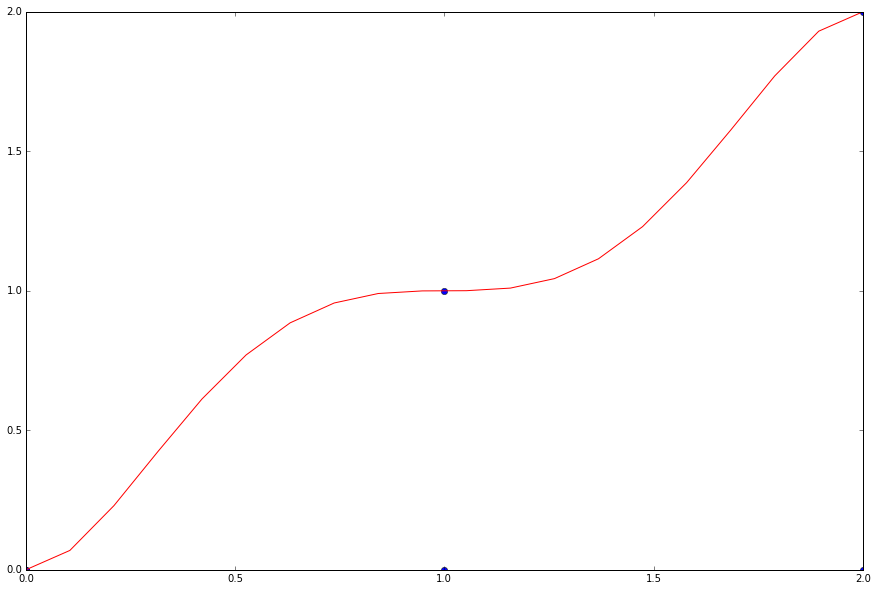

In [36]:

x=numpy.array([0,0,1,1,2,2]); y=numpy.array([0,0,1,0,2,0])
interp=scipy.interpolate.KroghInterpolator(x,y)
xn=numpy.linspace(0,2,20)   # evaluate the polynomial in a larger set
plt.plot(x,y,'o',xn,interp(xn),'r')
plt.show()



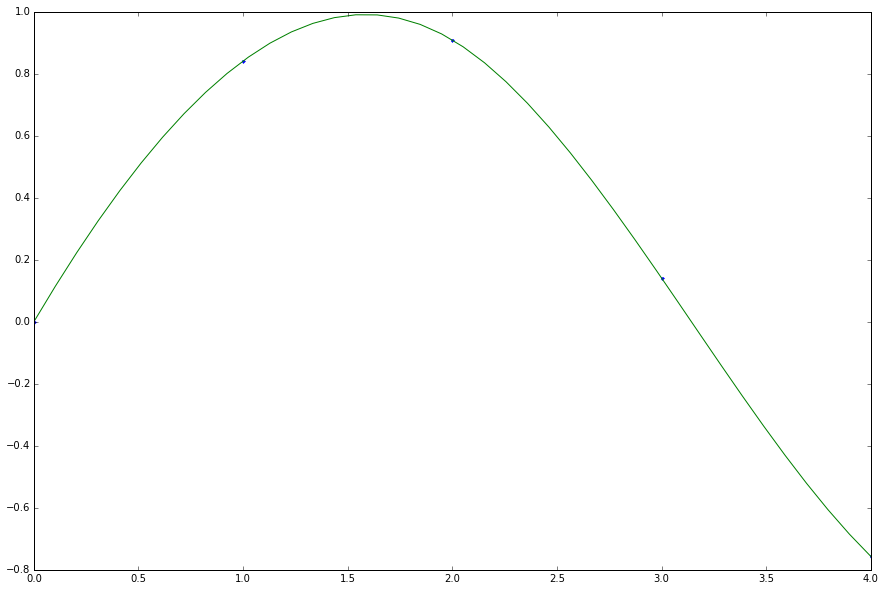

In [37]:
x=numpy.arange(5); y=numpy.sin(x)
xn=numpy.linspace(0,4,40)
interp=scipy.interpolate.InterpolatedUnivariateSpline(x,y)
plt.plot(x,y,'.',xn,interp(xn))
plt.show()

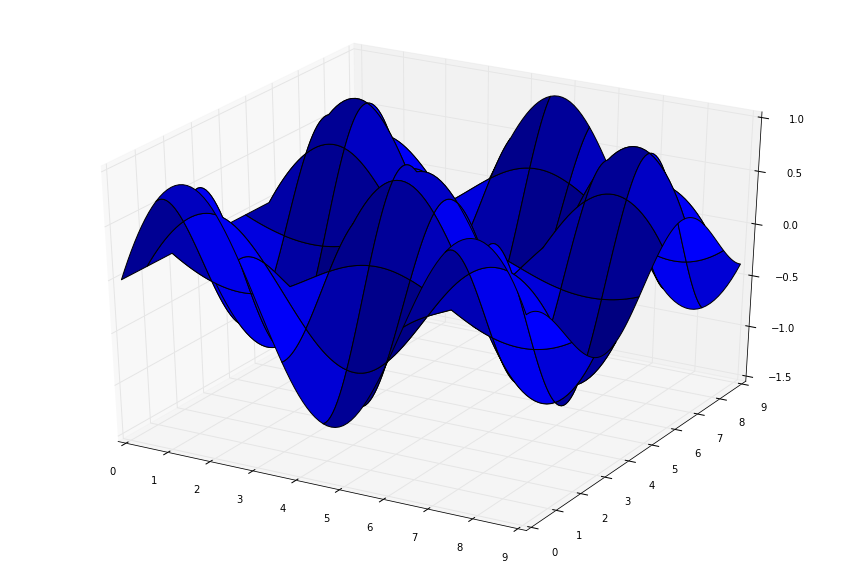

In [38]:
import numpy
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x=y=numpy.arange(10)
f=(lambda i,j: numpy.sin(i)*numpy.cos(j))  # function to interpolate
A=numpy.fromfunction(f, (10,10))           # generate samples
spline=scipy.interpolate.RectBivariateSpline(x,y,A)
fig=plt.figure()
subplot=fig.add_subplot(111,projection='3d')
xx=numpy.mgrid[0:9:100j, 0:9:100j]         # larger grid for plotting
A=spline(numpy.linspace(0,9,100), numpy.linspace(0,9,100))
subplot.plot_surface(xx[0],xx[1],A)
plt.show()

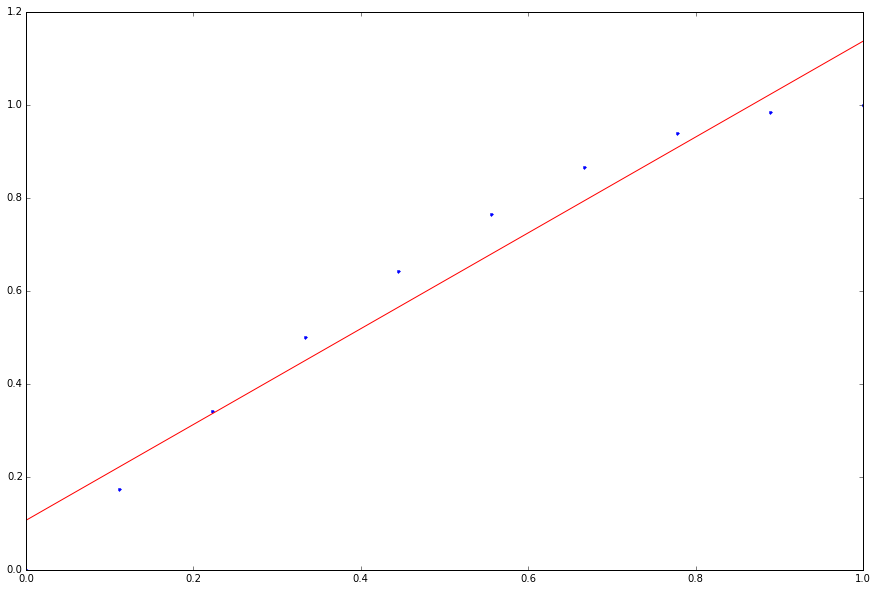

In [39]:

import numpy
import scipy
import matplotlib.pyplot as plt
x=numpy.linspace(0,1,10)
y=numpy.sin(x*numpy.pi/2)
line=numpy.polyfit(x,y,deg=1)
plt.plot(x,y,'.',x,numpy.polyval(line,x),'r')
plt.show()


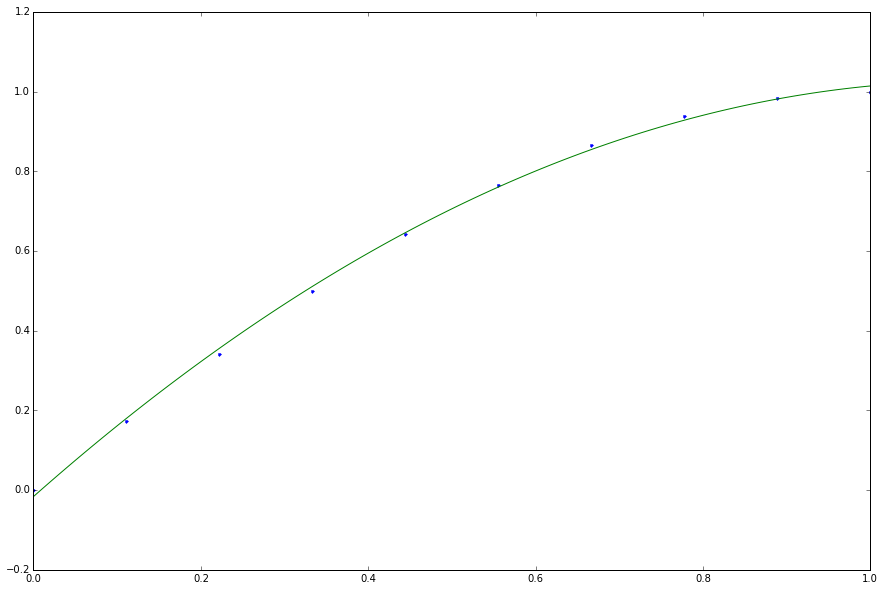

In [40]:

import numpy
import scipy.interpolate
import matplotlib.pyplot as plt
x=numpy.linspace(0,1,10)
y=numpy.sin(x*numpy.pi/2)
spline=scipy.interpolate.UnivariateSpline(x,y,k=2)
xn=numpy.linspace(0,1,100)
plt.plot(x,y,'.', xn, spline(xn))
plt.show()

In [41]:
x=None; y=None; yc=None

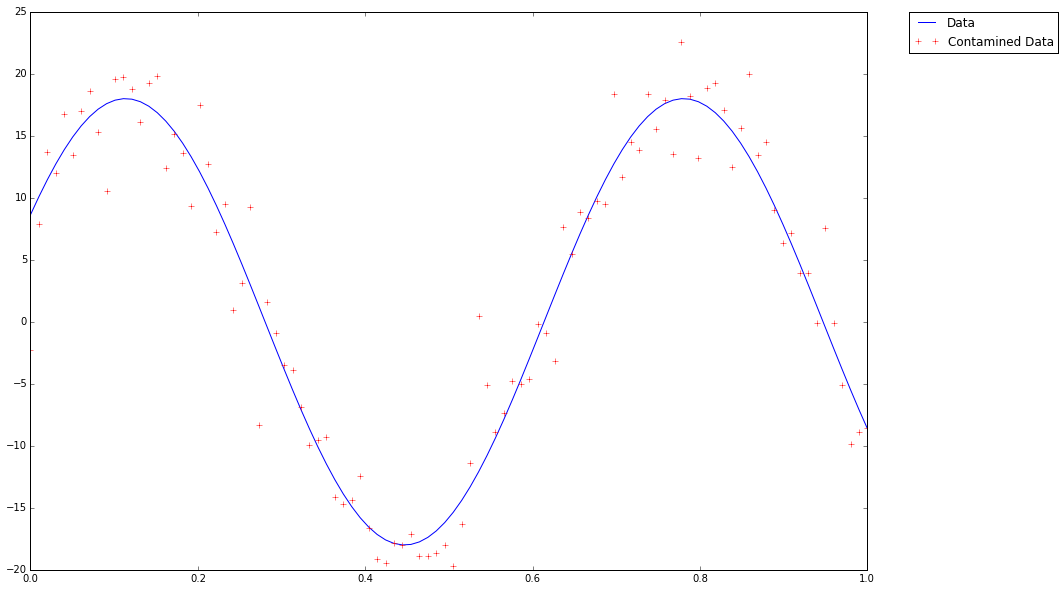

In [42]:
A=18; w=3*numpy.pi; h=0.5
x=numpy.linspace(0,1,100); y=A*numpy.sin(w*x+h)
plot1, = plt.plot(x, y, '-b', label="Data")

yc=None 
yc=scipy.copy(y)
yc += 4*((0.5-scipy.rand(100))*numpy.exp(2*scipy.rand(100)**2)) # contamined data
plot2, = plt.plot(x, yc, 'r+', label="Contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [43]:
p0=None
p0 = [20, 2*scipy.pi, 1]
target_function = lambda x,AA,ww,hh: AA*scipy.sin(ww*x+hh)

In [44]:
import scipy.optimize
pF=None; pVar = None
pF,pVar = scipy.optimize.curve_fit(target_function, x, yc, p0)
print(pF)


[ 17.94703039   9.43885629   0.48426396]


In [45]:
yFit=None
yFit=target_function(x,*pF)

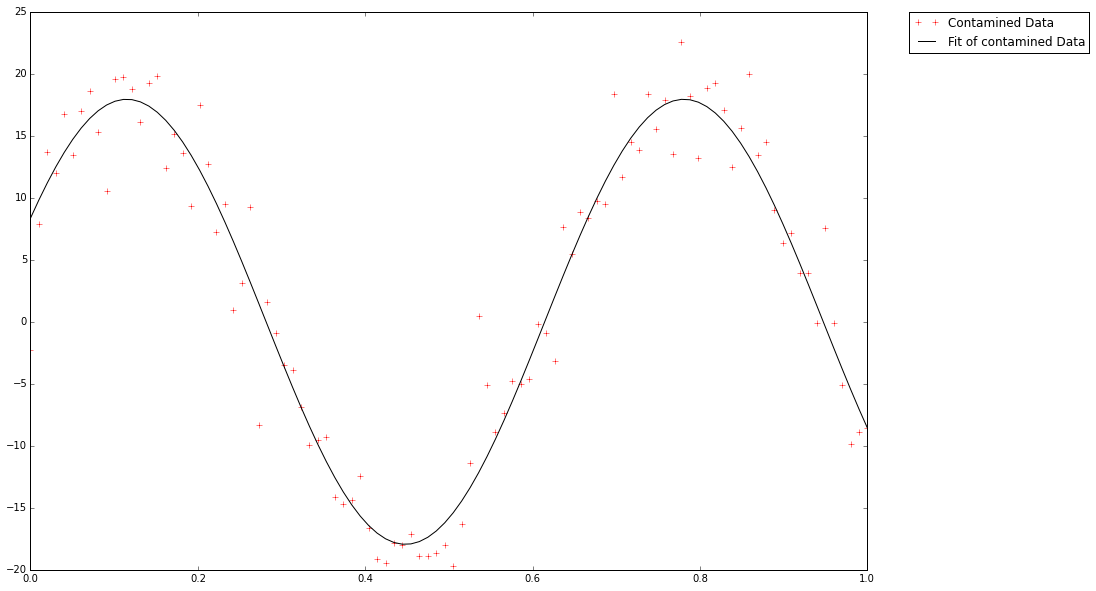

In [46]:
plot2, = plt.plot(x, yc, 'r+', label="Contamined Data")
plot3, = plt.plot(x, yFit,'k', label="Fit of contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

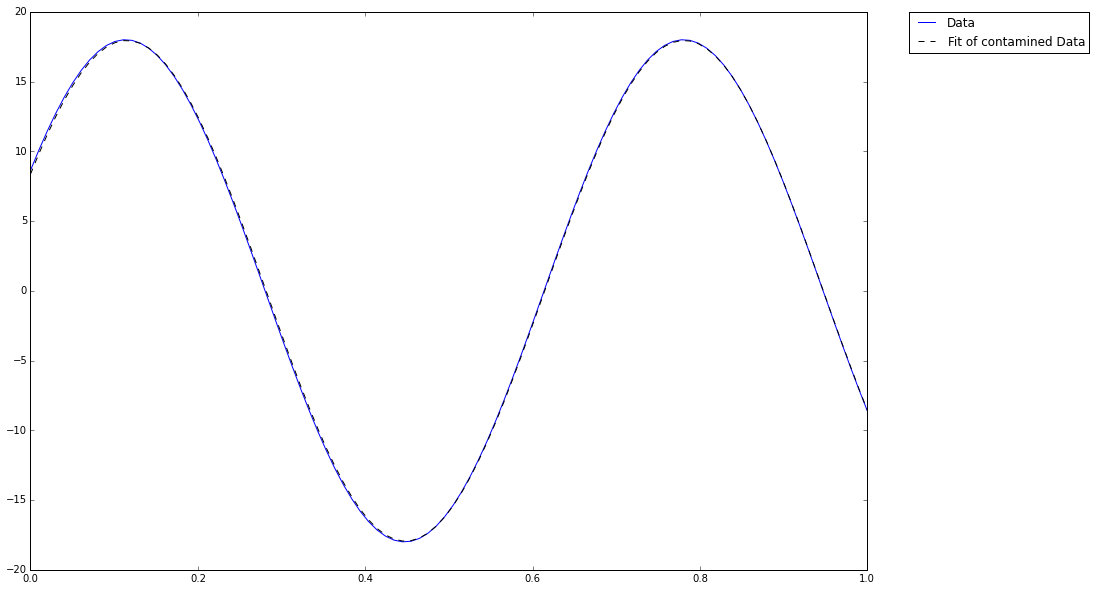

In [47]:
plot1, = plt.plot(x, y, '-b', label="Data")
plot3, = plt.plot(x, yFit,'--k', label="Fit of contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

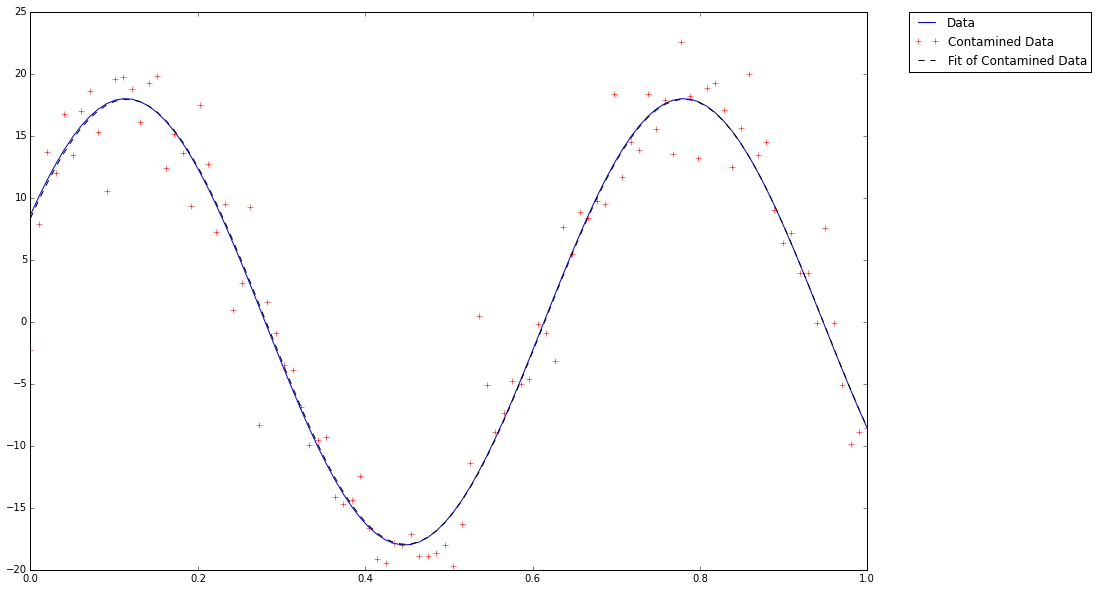

In [48]:
plot1, = plt.plot(x, y, '-b', label="Data")
plot2, = plt.plot(x, yc, 'r+', label="Contamined Data")
plot3, = plt.plot(x, yFit,'--k', label="Fit of Contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

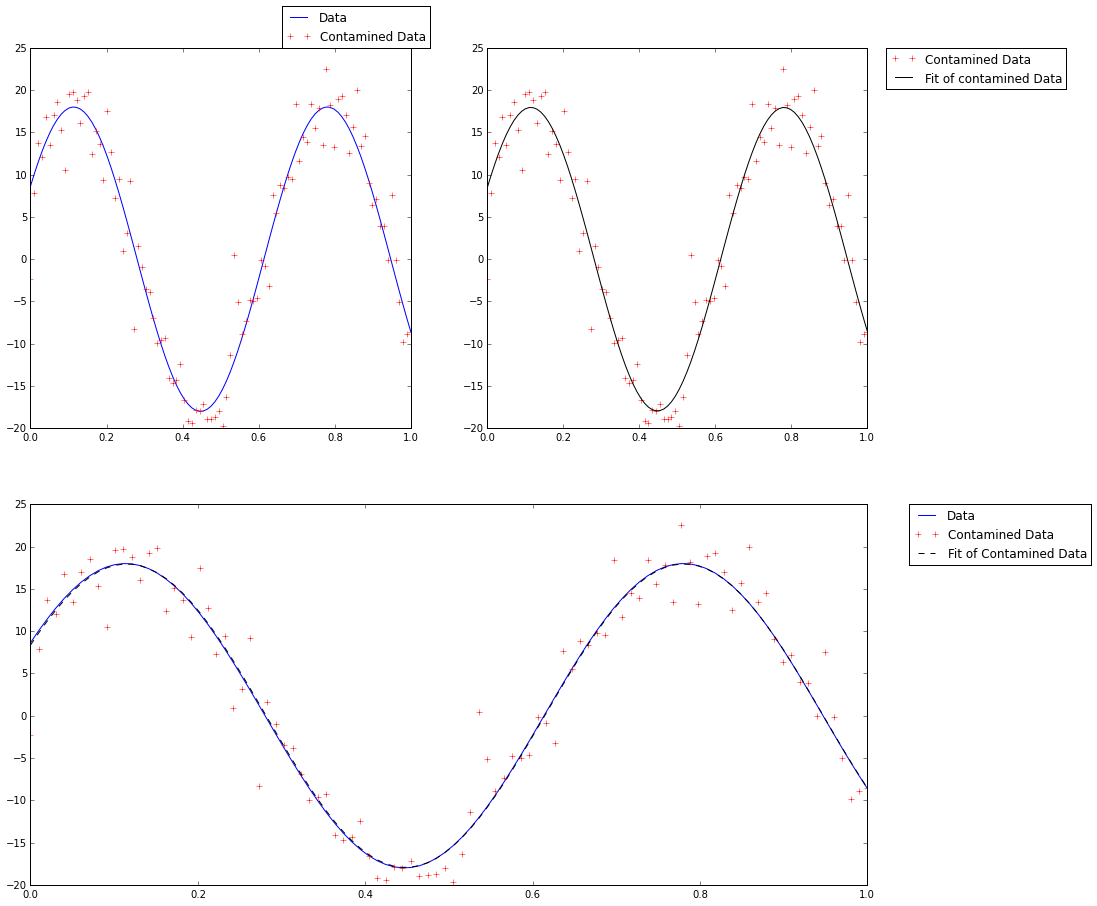

In [49]:

plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.subplot(2,2,1)
plt.plot(x, y, '-b', label="Data")
plt.plot(x, yc, 'r+', label="Contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)

plt.subplot(2,2,2)
plt.plot(x, yc, 'r+', label="Contamined Data")
plt.plot(x, yFit,'k', label="Fit of contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,1,2)
plt.plot(x, y, '-b', label="Data")
plt.plot(x, yc, 'r+', label="Contamined Data")
plt.plot(x, yFit,'--k', label="Fit of Contamined Data")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

# Optimization

<font color=blue><b>Implementing the <em>leastsq</em> function as described in the corresponding section of the book</b></font>

In [50]:
import numpy
import scipy

A=18; w=3*numpy.pi; h=0.5

x=None; y=None
x=numpy.linspace(0,1,100); y=A*numpy.sin(w*x+h)
y += 4*((0.5-scipy.rand(100))*numpy.exp(2*scipy.rand(100)**2))

import scipy.optimize
p0 = [20, 2*numpy.pi, 1]
target_function = lambda x,AA,ww,hh: AA*numpy.sin(ww*x+hh)

#pF,pVar = scipy.optimize.curve_fit(target_function, x, y, p0)
#print (pF)

In [51]:
error_function = lambda p,x,y: target_function(x,p[0],p[1],p[2])-y
lpF,lpVar = scipy.optimize.leastsq(error_function,p0,args=(x,y))
print (lpF)

[ 18.22349547   9.34977069   0.56592891]


## Minimization

In [52]:
import scipy.optimize
scipy.optimize.fmin(scipy.optimize.rosen,[0,0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 146


array([ 1.00000439,  1.00001064])

<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [53]:
help(scipy.optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead'
            - 'Powell'
            - 'CG'
            - 'BFGS'
            - 'Newton-CG'
            - 'Anneal (deprecated as of scipy version 0.14.0)'
            - 'L-BFGS-B'
            - 'TNC'
            - 'COBYLA'
            - 'SLSQP'
            - 'dogleg'
            - 'trust-ncg'
            - custom - a callable object (added in version 0.14.0)
    
  

## Roots

In [54]:
import scipy.special
print (scipy.special.jn_zeros(4,3))

[  7.58834243  11.06470949  14.37253667]


<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [55]:
import scipy.optimize
help(scipy.optimize.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'
            - 'lm'
            - 'broyden1'
            - 'broyden2'
            - 'anderson'
            - 'linearmixing'
            - 'diagbroyden'
            - 'excitingmixing'
            - 'krylov'
    
    jac : bool or callable, optional
        If `jac` is a Boolean and is True, `fun` is assumed to return the
        value of Jacobian along with the objective function. If False, the
        Jacobian will be estimated numerically.
        `jac` can also be a callable ret

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following equations is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$ \boxed{ \left\{   \begin{align}     x' & = x^2 - 2 x - y + 0.5 \\     y' & = x^2 + 4 y^2 - 4    \end{align}  \right. }$$

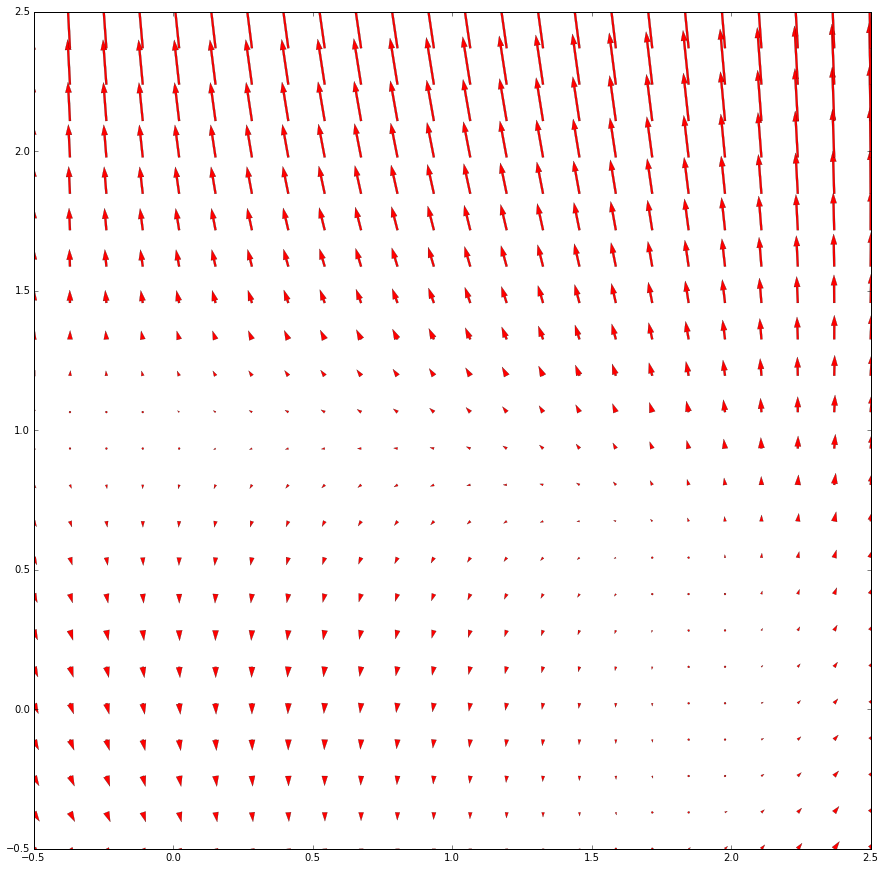

In [56]:
import numpy
import matplotlib.pyplot as plt
f=lambda x: [x[0]**2 - 2*x[0] - x[1] + 0.5, x[0]**2 + 4*x[1]**2 - 4]
x,y=numpy.mgrid[-0.5:2.5:24j,-0.5:2.5:24j]
U,V=f([x,y])
plt.quiver(x,y,U,V,color='r', \
         linewidths=(0.2,), edgecolors=('k'), \
         headaxislength=5)
plt.show()
         

In [57]:
import scipy.optimize
f=lambda x: [x[0]**2 - 2*x[0] - x[1] + 0.5, x[0]**2 + 4*x[1]**2 - 4]

In [58]:
scipy.optimize.root(f,[0,1])


  status: 1
 success: True
     qtf: array([ -4.81190247e-09,  -3.83395899e-09])
    nfev: 9
       r: array([ 2.38128242, -0.60840482, -8.35489601])
     fun: array([  3.59529073e-12,   3.85025345e-12])
       x: array([-0.22221456,  0.99380842])
 message: 'The solution converged.'
    fjac: array([[-0.98918813, -0.14665209],
       [ 0.14665209, -0.98918813]])

In [59]:
scipy.optimize.root(f,[2,0])

  status: 1
 success: True
     qtf: array([  2.08960516e-10,   8.61298294e-11])
    nfev: 12
       r: array([-4.56575336, -1.67067665, -1.81464307])
     fun: array([  2.44249065e-15,   1.42996726e-13])
       x: array([ 1.90067673,  0.31121857])
 message: 'The solution converged.'
    fjac: array([[-0.39612596, -0.91819618],
       [ 0.91819618, -0.39612596]])

## Integration

General references for the following topics:<br>
<b>scipy.special</b><br>
<http://docs.scipy.org/doc/scipy-0.14.0/reference/special.html>
<br>
<br>
<b>scipy.integrate</b><br>
<http://docs.scipy.org/doc/scipy-0.14.0/reference/integrate.html#module-scipy.integrate>
<br>
<br>
<b>The NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>

## Exponential/logarithm integrals

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following integrals is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$ \boxed{   \begin{align}     \mathrm{expn}(n,x) & = \int\limits_{1}^{\infty} \frac{\mathrm{e}^{-x t }}{\mathrm{t}^{n}} \,\mathrm{d}t  & \quad   \quad  \mathrm{exp1}(x) &= \int\limits_{1}^{\infty} \frac{\mathrm{e}^{-x t }}{\mathrm{t}} \,\mathrm{d}t  \\     \mathrm{expi}(x) & = \int\limits_{-\infty}^{x} \frac{\mathrm{e}^{t }}{\mathrm{t}} \,\mathrm{d}t  &\quad   \quad  \mathrm{dawsn}(x) &= \mathrm{e}^{-x^2} \int\limits_{0}^{x} \mathrm{e}^{t^2} \,\mathrm{d}t  \\     \mathrm{erf}(x) & = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{x} \mathrm{e}^{-t^2} \,\mathrm{d}t  &\quad   \quad  \mathrm{erfc}(x) &= \frac{2}{\sqrt{\pi}} \int\limits_{x}^{\infty} \mathrm{e}^{-t^2} \,\mathrm{d}t \\     \mathrm{spence}(x) & = - \int\limits_{1}^{x} \frac{\mathrm{log}(t )}{\mathrm{t - 1}} \,\mathrm{d}t  &\quad   \quad \quad  & \quad \end{align}  }$$

## Trigonometric and hyperbolic trigonometric integrals

A general references for the following topics are:<br>
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<b>Table of the Fresnel Sine and Cosine Integrals</b><br>
<http://www.mymathlib.com/functions/fresnel_sin_cos_integrals.html>
<br>
<br>
<font color=red><b>The meaning of the following integrals is fully explained on the corresponding section for this chapter in the book</b></font>

###  $$ \boxed{   \begin{align}     \mathrm{fresnel}(z) & = \int\limits_{0}^{z} \sin\left({\frac{\pi}{2}t^2}\right)\mathrm{d}t  \quad   \quad  \\     \mathrm{sici}(x) & = \int\limits_{0}^{x} \frac{\mathrm{sin}(t )}{\mathrm{t}}\mathrm{d}t, \quad   \quad  \gamma + \mathrm{log}(x) + \int\limits_{0}^{x} \frac{\cos(t) - 1}{\mathrm{t}}\mathrm{d}t  \\     \mathrm{shichi}(x) & = \int\limits_{0}^{x} \frac{\mathrm{sinh}(t )}{\mathrm{t}}\mathrm{d}t, \quad   \quad  \gamma + \mathrm{log}(x) + \int\limits_{0}^{x} \frac{\cosh(t) - 1}{\mathrm{t}}\mathrm{d}t  \end{align}  }$$

## $$ \boxed{ \begin{equation} \gamma = \lim\limits_{n \to \infty} \left( \sum\limits_{k=1}^{n} \frac{1}{k} - log(n) \right) \end{equation} }$$

## Elliptic integrals

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following integrals is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$ \boxed{   \begin{align} \mathrm{ellipkm1}(m) & = \int\limits_{0}^{\pi/2} \frac{\mathrm{d}\theta}{\sqrt{1 - \mathrm{m} \sin^2(\theta)}}  & \quad  \mathrm{ellipe}(m) &= \int\limits_{0}^{\pi/2} \sqrt{1 - \mathrm{m} \sin^2(\theta)} \,\mathrm{d}\theta  \\ \mathrm{ellipkinc}(m,n) & = \int\limits_{0}^{n} \frac{\mathrm{d}\theta}{\sqrt{1 - \mathrm{m} \sin^2(\theta)}}  & \quad  \mathrm{ellipeinc}(m,n) &= \int\limits_{0}^{n} \sqrt{1 - \mathrm{m} \sin^2(\theta)} \,\mathrm{d}\theta  \end{align}  }$$

## Gamma and beta integrals

A general reference for the following topics is the
<b>NIST Digital Library of Mathematical Functions</b>
<br>
<http://dlmf.nist.gov/>
<br>
<br>
<font color=red><b>The meaning of the following integrals is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$ \boxed{   \begin{align} \mathrm{gammainc}(a,x) & = \frac{1}{\Gamma(a)} \int\limits_{0}^{x} \mathrm{e}^{-t}\mathrm{t}^{a-1} \,\mathrm{d}t  \\ \mathrm{gammaincc}(a,x) & = \frac{1}{\Gamma(a)} \int\limits_{x}^{\infty} \mathrm{e}^{-t}\mathrm{t}^{a-1} \,\mathrm{d}t  \\ \mathrm{betainc}(a,b,x) & = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \int\limits_{0}^{x} \mathrm{t}^{a-1}(\mathrm{t-1})^{b-1} \,\mathrm{d}t \end{align}  }$$

## Numerical Integration

<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [60]:
import scipy.integrate
help(scipy.integrate.quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:
    
            f(int n, double args[n]),
    
        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
     

<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [61]:
help(scipy.integrate.simps)

Help on function simps in module scipy.integrate.quadrature:

simps(y, x=None, dx=1, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule.  If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals.  The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : int, optional
        Spacing of integration points along axis of `y`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : {'avg', 'first', 'str'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trapezoidal rule 

In [62]:
f=lambda t: numpy.exp(-t)*t**4
from scipy.special import gammainc
from scipy.integrate import quad
from scipy.misc import factorial
print (gammainc(5,1))

0.00365984682734


In [63]:
print('%.19f' % gammainc(5,1))

0.0036598468273437131


In [64]:
import numpy
result,error=quad(f,0,1)/factorial(4)
result

0.0036598468273437122

In [65]:
import numpy
import scipy.integrate
x=numpy.linspace(0,1,10000)
scipy.integrate.simps(f(x)/factorial(4), x)

0.0036598468273469071

## Ordinary differential equations

<font color=red><b>The meaning of the following equation is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$ \boxed{ \begin{equation} \frac{d\mathbf{y}}{dt} = f(t,\mathbf{y}), \,\,\, \mathbf{y}(t)=(y_1(t),\dots,y_n(t)), \,\,\,t \in \mathbb{R} \end{equation} }$$

<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [66]:
import scipy.integrate
help(scipy.integrate.ode)

Help on class ode in module scipy.integrate._ode:

class ode(__builtin__.object)
 |  A generic interface class to numeric integrators.
 |  
 |  Solve an equation system :math:`y'(t) = f(t,y)` with (optional) ``jac = df/dy``.
 |  
 |  Parameters
 |  ----------
 |  f : callable ``f(t, y, *f_args)``
 |      Rhs of the equation. t is a scalar, ``y.shape == (n,)``.
 |      ``f_args`` is set by calling ``set_f_params(*args)``.
 |      `f` should return a scalar, array or list (not a tuple).
 |  jac : callable ``jac(t, y, *jac_args)``
 |      Jacobian of the rhs, ``jac[i,j] = d f[i] / d y[j]``.
 |      ``jac_args`` is set by calling ``set_f_params(*args)``.
 |  
 |  Attributes
 |  ----------
 |  t : float
 |      Current time.
 |  y : ndarray
 |      Current variable values.
 |  
 |  See also
 |  --------
 |  odeint : an integrator with a simpler interface based on lsoda from ODEPACK
 |  quad : for finding the area under a curve
 |  
 |  Notes
 |  -----
 |  Available integrators are listed be

<b>Let's solve via <em>ode</em> the following initial value problem (<font color=red>for additional details, pleae see the corresponding section for this chapter in the book</font></b>)

##  $$ \boxed{ \begin{equation} y' = - 20 y, \,\,\, y(0)=1 \end{equation} }$$

<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [67]:
import numpy
from scipy.integrate import ode
f=lambda t,y: -20*y        # The ODE
actual_solution=lambda t:numpy.exp(-20*t)  # actual solution
dt=0.01            # time step
solver=ode(f).set_integrator('dop853')  # solver
solver.set_initial_value(1,0)      # initial value
while solver.successful() and solver.t<=1+dt:
   # solve the equation at succesive time steps,
   # until the time is greater than 1
   # but make sure that the solution is successful
   print (solver.t, solver.y, actual_solution(solver.t))
   # We compare each numerical solution with the actual
   # solution of the ODE
   solver.integrate(solver.t + dt)    # solve next step

(0, array([ 1.]), 1.0)
(0.01, array([ 0.81873075]), 0.81873075307798182)
(0.02, array([ 0.67032005]), 0.67032004603563933)
(0.03, array([ 0.54881164]), 0.54881163609402639)
(0.04, array([ 0.44932896]), 0.44932896411722156)
(0.05, array([ 0.36787944]), 0.36787944117144233)
(0.060000000000000005, array([ 0.30119421]), 0.30119421191220203)
(0.07, array([ 0.24659696]), 0.24659696394160643)
(0.08, array([ 0.20189652]), 0.20189651799465538)
(0.09, array([ 0.16529889]), 0.16529888822158656)
(0.09999999999999999, array([ 0.13533528]), 0.13533528323661273)
(0.10999999999999999, array([ 0.11080316]), 0.11080315836233391)
(0.11999999999999998, array([ 0.09071795]), 0.090717953289412553)
(0.12999999999999998, array([ 0.07427358]), 0.074273578214333905)
(0.13999999999999999, array([ 0.06081006]), 0.060810062625217973)
(0.15, array([ 0.04978707]), 0.049787068367863944)
(0.16, array([ 0.0407622]), 0.040762203978366211)
(0.17, array([ 0.03337327]), 0.033373269960326066)
(0.18000000000000002, array([ 0

<font color=red><b>Click the left mouse button on the left of the output 
of the following command to shorten the displayed output in a elevator 
type window</b></font>

In [68]:
help(scipy.integrate.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 

## Lorenz Attractors

<font color=red><b>The meaning of the following equations is fully explained on the corresponding section for this chapter in the book</b></font>

##  $$ \boxed{ \left\{   \begin{align} \frac{dx}{dt} & = \sigma(y-x) \\ \frac{dy}{dt} & = r x - y - x z \\ \frac{dz}{dt} & = x y - b z   \end{align}  \right. }$$

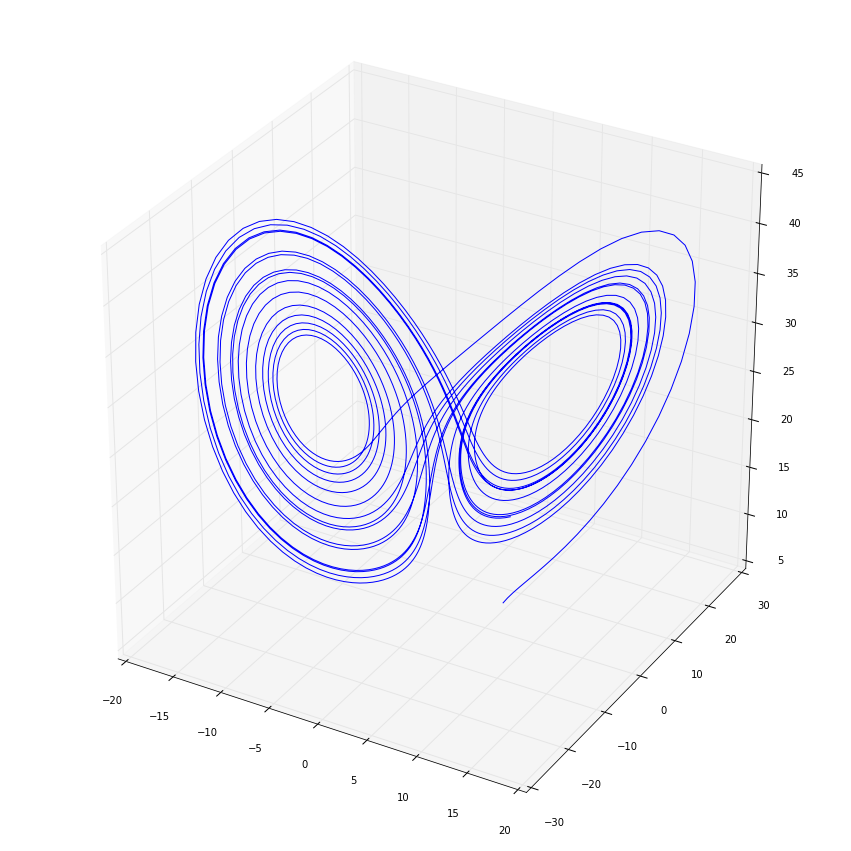

In [69]:
import numpy
from numpy import linspace
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sigma=10.0
b=8.0/3.0
r=28.0
f = lambda x,t: [sigma*(x[1]-x[0]),
                 r*x[0]-x[1]-x[0]*x[2],
                 x[0]*x[1]-b*x[2]]

t=linspace(0,20,2000); y0=[5.0,5.0,5.0]
solution=odeint(f,y0,t)
X=solution[:,0]; Y=solution[:,1]; Z=solution[:,2]

import matplotlib.pyplot as plt
plt.gca(projection='3d'); plt.plot(X,Y,Z)
plt.show()


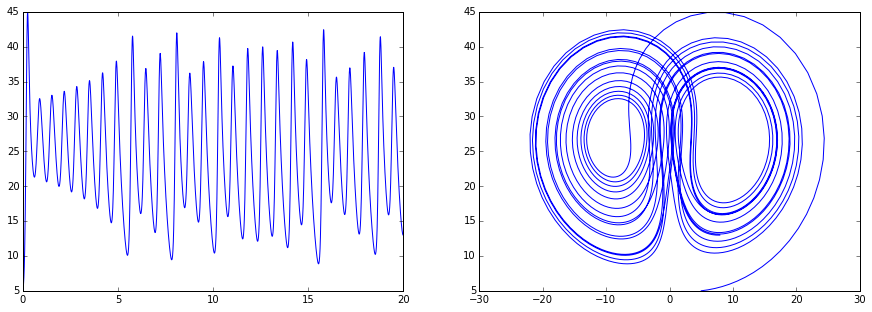

In [70]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.subplot(121); plt.plot(t,Z)
plt.subplot(122); plt.plot(Y,Z)
plt.show()

##  <center> This is the end of the working codes shown and thoroughly discussed in Chapter 4 of the book <font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font>
</center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###
